## Quadratic Penalty Algorithm

In [22]:
from scipy.optimize import minimize
import numpy as np
from numpy.linalg import norm

def penalty(z, mu):
    f = z[0]**2 + 4 * z[0] * z[1] + 5*z[1]**2 - 10*z[0] - 20*z[1]
    c = 2 - z[0] - z[1]
    return f + mu * c**2

mu_list = 10**np.array([1,3,5,7])
x = np.zeros(2)
x_star = np.array([.5, 1.5])
err = []
cond = []
for k, mu in enumerate(mu_list):
    sol = minimize(penalty, x, args=(mu,), tol=1e-5)
    x = sol["x"]
    print("func:\t", f'{sol["fun"]:5.4e}')
    print("mu:\t",  f'{mu:2.1e}')
    print("x:\t", sol["x"])
    print("err:\t", f'{norm(x - x_star):3.2e}')
    print("")
    err.append(norm(x - x_star))
    cond.append(np.linalg.cond(sol["hess_inv"]))
print(sol)

func:	 -2.0714e+01
mu:	 1.0e+01
x:	 [0.71428572 1.42857141]
err:	 2.26e-01

func:	 -2.0502e+01
mu:	 1.0e+03
x:	 [0.50224888 1.49925036]
err:	 2.37e-03

func:	 -2.0500e+01
mu:	 1.0e+05
x:	 [0.50002263 1.49999236]
err:	 2.39e-05

func:	 -2.0500e+01
mu:	 1.0e+07
x:	 [0.50000024 1.4999999 ]
err:	 2.57e-07

      fun: -20.500000224444914
 hess_inv: array([[ 0.50000011, -0.49999999],
       [-0.49999999,  0.49999991]])
      jac: array([5.24520874e-06, 5.24520874e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([0.50000024, 1.4999999 ])


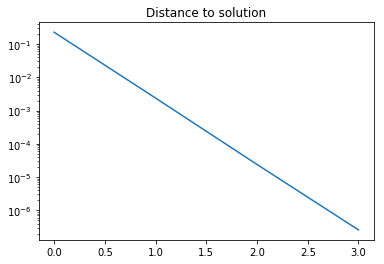

In [4]:
import matplotlib.pyplot as plt
plt.title("Distance to solution")
plt.plot(err)
plt.yscale("log")
plt.show()

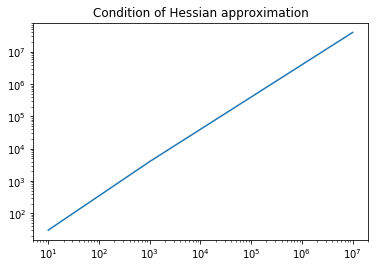

In [5]:
plt.title("Condition of Hessian approximation")
plt.plot(mu_list, cond)
plt.yscale("log")
plt.xscale("log")
plt.show()